In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

Los vecinos de h son: ['a', 'e']
La cantidad de aristas por nodo son: [('a', 3), ('b', 5), ('c', 3), ('d', 4), ('e', 3), ('f', 3), ('g', 3), ('h', 2)]
El diccionario es: {'a': 3, 'b': 5, 'c': 3, 'd': 4, 'e': 3, 'f': 3, 'g': 3, 'h': 2}
La matriz de incidencia es: 
 [[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
La matriz de adyacencia es: 
 [[ 0  6  0  9  0  0  0  5]
 [ 6  0  7  0  8  2 11  0]
 [ 0  7  0  3  0  0  4  0]
 [ 9  0  3  0  6  5  0  0]
 [ 0  8  0  6  0  0  0 12]
 [ 0  2  0  5  0  0  9  0]
 [ 0 11  4  0  0  9  0  0]
 [ 5  0  0  0 12  0  0  0]]
Los valores de los enlaces del nodo:  {'b': {'weight': 7}, 'g': {'weight': 4}, 'd': {'weight': 3}}
La longitud de chasta el objetivo es:  {'c': 0, 'b':

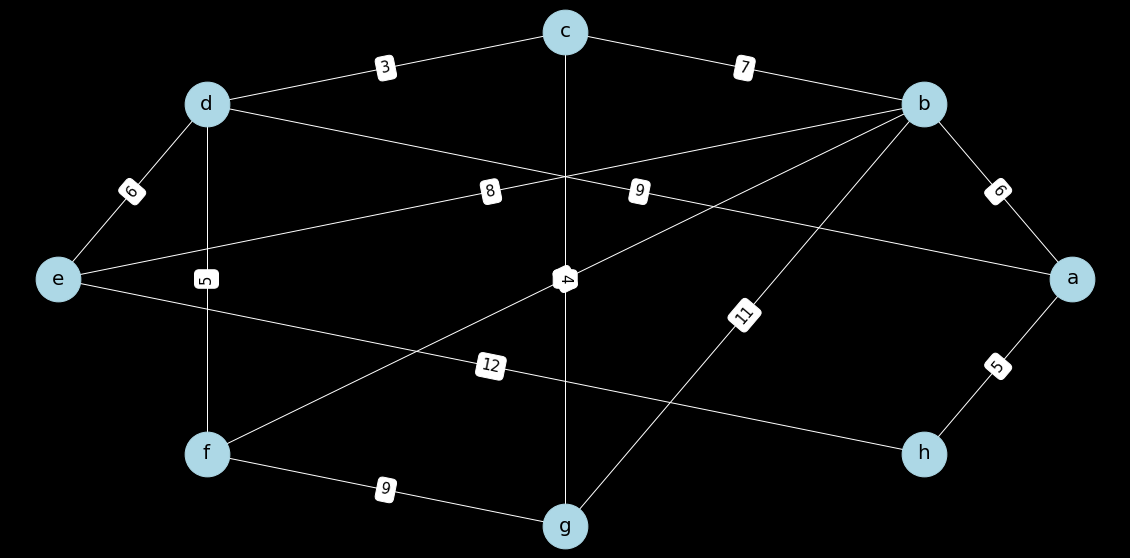

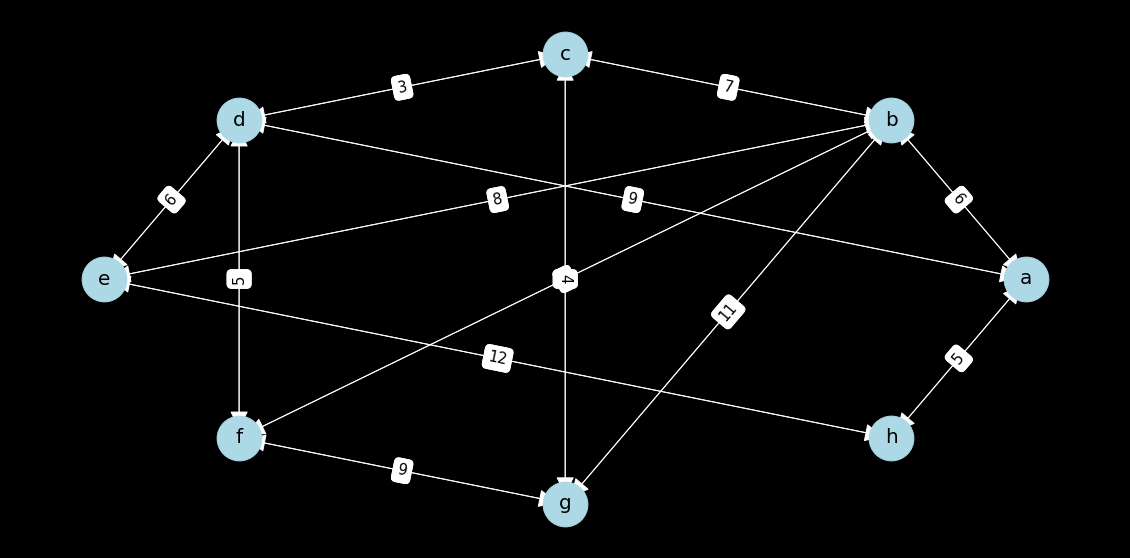

In [2]:
class grafo:
    def __init__(self, Grafico, nodos, relaciones_con_peso):
        self.grafo = Grafico
        self.grafo.add_nodes_from(nodos)
        self.grafo.add_weighted_edges_from(relaciones_con_peso)
        self.position=nx.circular_layout(self.grafo)

    def mostrar_diagrama(self, grafico):
        nx.adjacency_matrix(grafico)
        nx.incidence_matrix(grafico)
        fig, ax = plt.subplots(figsize=(20,10))

        nx.draw_networkx_nodes(grafico, self.position, node_color="lightblue", node_size=2000)
        nx.draw_networkx_labels(grafico, self.position, font_size=20, font_family='sans-serif')
        nx.draw_networkx_edges(grafico, self.position, width=1, arrowsize = 40,edge_color='white')

        labels=nx.get_edge_attributes(grafico,'weight')
        nx.draw_networkx_edge_labels(grafico, self.position, font_size=15, edge_labels=labels)

        plt.axis('off')
        fig.set_facecolor('black')
        plt.show()

    def mostrar_vecinos_de(self, nodo):
        print("Los vecinos de " + nodo + " son: " + str(list(self.grafo.neighbors(nodo))))

    def mostrar_cant_de_aristas_por_nodo(self):
        print("La cantidad de aristas por nodo son: " + str(self.grafo.degree()))
    
    def retornar_cant_de_aristas_por_nodo(self):
        return self.grafo.degree()

    def mostrar_diccionario_de(self, emitir):
        print("El diccionario es: " + str(dict(emitir)))

    def mostrar_matriz_incidencia(self):
        matriz_incidencia =  nx.incidence_matrix(self.grafo)
        print("La matriz de incidencia es: \n", matriz_incidencia.todense())
    
    def mostrar_matriz_adyacencia(self):
        matriz_adyacencia = nx.adjacency_matrix(self.grafo)
        print("La matriz de adyacencia es: \n", matriz_adyacencia.todense()) 

    def mostrar_los_enlace_de(self, nodo):
        print("Los valores de los enlaces del nodo: ", self.grafo[nodo])
    
    def longitud_desde_nodo_hasta_el_objetivo(self, nodo):
        print("La longitud de " + nodo + "hasta el objetivo es: ",nx.single_source_shortest_path_length(self.grafo, nodo))

    def promedio_de_ruta_mas_corta_con_floyd_warshall(self):
        print("El promedio de la ruta mas corta con floyd-warshall es: " + str(nx.algorithms.average_shortest_path_length(self.grafo, method="floyd-warshall")))
        
    def mostrar_ruta_ponderada_entre_dos_nodos_Dijkstra(self, nodo_a, nodo_b):
        print("La ruta ponderada entre dos nodos con Dijkstra es: " + str(nx.algorithms.dijkstra_path(self.grafo, nodo_a, nodo_b)))

    def mostrar_longitud_ponderada_entre_dos_nodos_Dijkstra(self, nodo_a, nodo_b):
         print("La longitud ponderada entre dos nodos con Dijkstra es: " + str(nx.algorithms.dijkstra_path_length(self.grafo, nodo_a, nodo_b)))

    def mostrar_longitud_ponderada_mas_corta_desde(self, nodo):
        print("La longitud de Ruta ponderada más corta desde el nodo " + nodo + " es :", nx.single_source_dijkstra_path_length(self.grafo,nodo))

    def mostrar_radio(self):
        print("Radio: " + str(nx.radius(self.grafo, e=None, usebounds=False)))

    def mostrar_diametro(self):
        print("Diametro: " + str(nx.diameter(self.grafo, e=None, usebounds=False)))

    def mostrar_excentricidad(self):
        print("Excentricidad: " + str(nx.eccentricity(self.grafo)))

    def mostrar_centro(self):
        print("Centro: " + str(nx.center(self.grafo, e=None, usebounds=False)))

    def mostrar_perisferia(self):
        print("Perisferia: " + str(nx.periphery(self.grafo, e=None, usebounds=False)))

    def mostrar_densidad(self):
        print("Densidad: " + str(nx.density(self.grafo)))

    def convertir_grafo_dirigido(self):
        return self.grafo.to_directed() 

# Nodos y relaciones
nodos = ['a','b','c','d','e','f','g','h'] 
relaciones_con_peso = [
    ('a','b', 6), 
    ('a','d', 2), 
    ('a','h', 5), 
    ('b','c', 7),
    ('b','e', 8),
    ('b','g', 11), 
    ('c','g', 4), 
    ('d','a', 9), 
    ('d','c', 3), 
    ('d','f', 5), 
    ('e','d', 6),
    ('e','h', 12),
    ('f','b', 2),
    ('f','g', 9)]


#  ------------------- Respuestas --------------------
Grafico = nx.Graph()

# 1. Crear la clase grafo 
mi_grafico = grafo(Grafico, nodos, relaciones_con_peso)

# 2.1 Emitir los vecinos de ‘H’
mi_grafico.mostrar_vecinos_de('h')

# 2.2 Emitir cantidad de aristas de cada nodo.
mi_grafico.mostrar_cant_de_aristas_por_nodo()

# 2.3 Convertir en diccionario la salida anterior.
mi_grafico.mostrar_diccionario_de(mi_grafico.retornar_cant_de_aristas_por_nodo())

# 2.4 Crear la matriz de adyacencia y emitirla.
mi_grafico.mostrar_matriz_incidencia()

# 2.5 Crear la matriz de incidencia y emitirla.
mi_grafico.mostrar_matriz_adyacencia()

# 2.6 Emitir valores de los enlaces del nodo ‘C’
mi_grafico.mostrar_los_enlace_de('c')

# 2.7 Emitir la longitud desde ‘C’ hasta el objetivo.
mi_grafico.longitud_desde_nodo_hasta_el_objetivo('c')

# 2.8 Emitir el promedio de la ruta más corta usando el método de floyd-warshall.
mi_grafico.promedio_de_ruta_mas_corta_con_floyd_warshall()

# 2.9 Emitir la ruta ponderada más corta entre ‘A’ y ‘H’ usando el algoritmo de Dijkstra.
mi_grafico.mostrar_ruta_ponderada_entre_dos_nodos_Dijkstra('a', 'h')

# 2.10 Emitir la longitud de la ruta ponderada entre ‘A’ y ‘H’
mi_grafico.mostrar_longitud_ponderada_entre_dos_nodos_Dijkstra('a', 'h')

# 2.11 Emitir la longitud de la ruta desde el nodo ‘G’
mi_grafico.mostrar_longitud_ponderada_mas_corta_desde('g')

# 2.12 Emitir el radio del grafo.
mi_grafico.mostrar_radio()

# 2.13 Emitir el diámetro del grafo.
mi_grafico.mostrar_diametro()

# 2.14 Emitir la excentricidad.
mi_grafico.mostrar_excentricidad()

# 2.15 Emitir el centro del grafo.
mi_grafico.mostrar_centro()

# 2.16 Emitir la periferia del grafo.
mi_grafico.mostrar_perisferia()

# 2.17 Emitir la densidad.
mi_grafico.mostrar_densidad()

# 2.18 Dibujar el grafo y emitir.
mi_grafico.mostrar_diagrama(mi_grafico.grafo)

# 2.19 Convertir en grafo dirigido.
dirigido = mi_grafico.convertir_grafo_dirigido()

# 2.20 Dibujar el nuevo grafo y emitirlo.
mi_grafico.mostrar_diagrama(dirigido)



In [3]:
#3. Encuentra la expresión regular para extraer de cada línea el aeropuerto de destino y el
# precio, por ejemplo para la primera línea será 'CNQ;95.45'

string = """1. AEP;CNQ;95.45;680.00
2. EZE;IRJ;39.50;4780.00
3. JNI;COC;51.44;1160.00
4. LPG;AEP;66.26;7580.00
5. MDQ;GPO;18.85;720.00
6. FDO;RYO;26.49;340.00"""

result = re.findall(r'([\w]{1,3};[\d]{1,2}\.[\d]{1,2})', string)
print(result)


['CNQ;95.45', 'IRJ;39.50', 'COC;51.44', 'AEP;66.26', 'GPO;18.85', 'RYO;26.49']
